In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
df = pd.read_csv('Iris.csv')

In [31]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df = df.iloc[:,1:]

In [33]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
encoder = LabelEncoder()

In [36]:
df['Species'] = encoder.fit_transform(df['Species'])

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [37]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [39]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

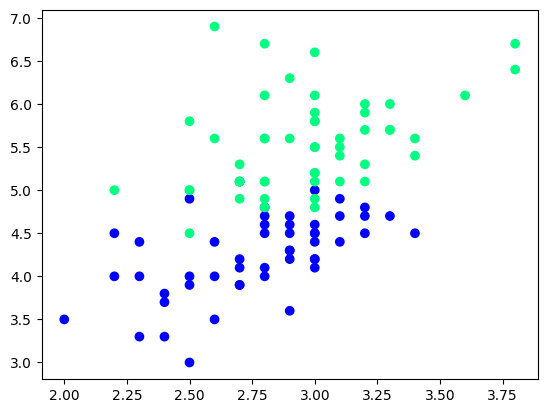

In [41]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [42]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
94,2.7,4.2,1
99,2.8,4.1,1
103,2.9,5.6,2
67,2.7,4.1,1
109,3.6,6.1,2
79,2.6,3.5,1
98,2.5,3.0,1
56,3.3,4.7,1
100,3.3,6.0,2
76,2.8,4.8,1


In [43]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [44]:
df_train

,SepalWidthCm,PetalLengthCm,Species
128,2.8,5.6,2
118,2.6,6.9,2
108,2.5,5.8,2
125,3.2,6.0,2
145,3.0,5.2,2
74,2.9,4.3,1
116,3.0,5.5,2
61,3.0,4.2,1
82,2.7,3.9,1
113,2.5,5.0,2


In [45]:
df_val

,SepalWidthCm,PetalLengthCm,Species
110,3.2,5.1,2
115,3.2,5.3,2
95,3.0,4.2,1
140,3.1,5.6,2
63,2.9,4.7,1


In [46]:
df_test

,SepalWidthCm,PetalLengthCm,Species
51,3.2,4.5,1
56,3.3,4.7,1
139,3.1,5.4,2
85,3.4,4.5,1
147,3.0,5.2,2


In [47]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [48]:
y_test

array([2, 2, 1, 2, 1])

# Case 1 - Bagging

     SepalWidthCm  PetalLengthCm  Species
108           2.5            5.8        2
74            2.9            4.3        1
108           2.5            5.8        2
125           3.2            6.0        2
113           2.5            5.0        2
128           2.8            5.6        2
116           3.0            5.5        2
108           2.5            5.8        2


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

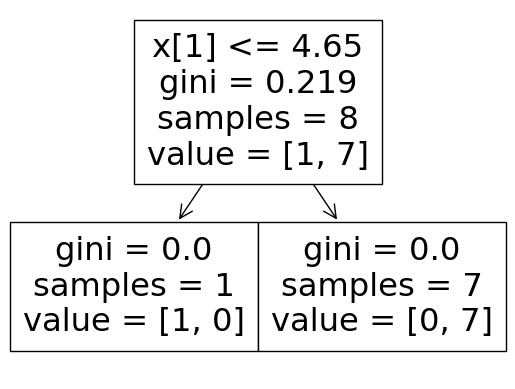

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is depre

0.8
     SepalWidthCm  PetalLengthCm  Species
128           2.8            5.6        2
74            2.9            4.3        1
116           3.0            5.5        2
82            2.7            3.9        1
61            3.0            4.2        1
118           2.6            6.9        2
108           2.5            5.8        2
125           3.2            6.0        2


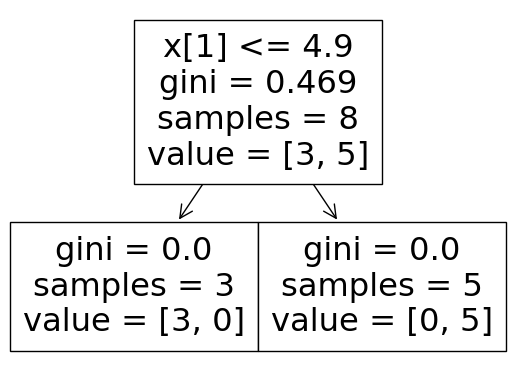

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is depre

1.0
     SepalWidthCm  PetalLengthCm  Species
128           2.8            5.6        2
113           2.5            5.0        2
125           3.2            6.0        2
125           3.2            6.0        2
116           3.0            5.5        2
125           3.2            6.0        2
125           3.2            6.0        2
125           3.2            6.0        2


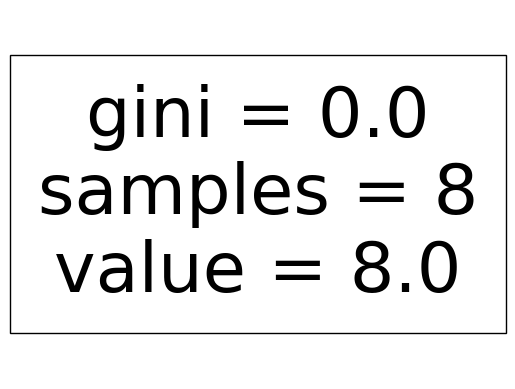

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


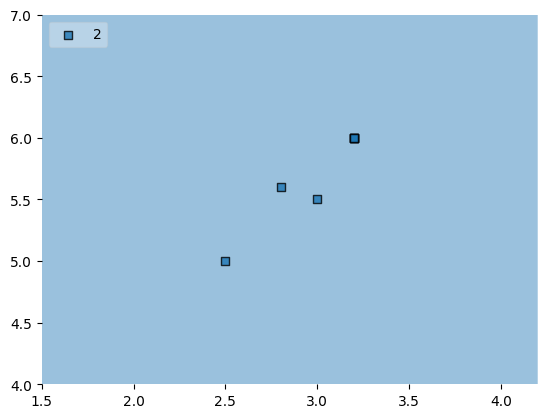

In [87]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

print(df_bag)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
dt_bag1 = DecisionTreeClassifier()
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    
evaluate(dt_bag1,X,y)
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
print(df_bag)
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
print(df_bag)
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [72]:
df_test
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

,SepalWidthCm,PetalLengthCm,Species
51,3.2,4.5,1
56,3.3,4.7,1
139,3.1,5.4,2
85,3.4,4.5,1
147,3.0,5.2,2


# Pasting

In [74]:
# Row sampling without replacement
df_train
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
128,2.8,5.6,2
118,2.6,6.9,2
108,2.5,5.8,2
125,3.2,6.0,2
145,3.0,5.2,2
74,2.9,4.3,1
116,3.0,5.5,2
61,3.0,4.2,1
82,2.7,3.9,1
113,2.5,5.0,2


# Random Subspaces

In [85]:
df1 = pd.read_csv('Iris.csv')
print(df1)
df1 = df1.sample(10)
print(df1.sample(2,replace=True,axis=1))
print(df1)
print(df1.sample(8,replace=True).sample(2,replace=True,axis=1))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  